In [1]:
# 필요 라이브러리 import
import pandas as pd
import numpy as np

# 국민건강보험공단_건강검진정보_2021_12 분석
건강검진 결과지 제대로 읽는 법


https://health.chosun.com/site/data/html_dir/2016/11/30/2016113001291.html

## 1. 데이터 전처리

### 1) 각 질병 컬럼 추가

In [2]:
url1="https://raw.githubusercontent.com/KimYounghwan/bigdata/master/%EA%B5%AD%EB%AF%BC%EA%B1%B4%EA%B0%95%EB%B3%B4%ED%97%98%EA%B3%B5%EB%8B%A8_%EA%B1%B4%EA%B0%95%EA%B2%80%EC%A7%84%EC%A0%95%EB%B3%B4_20211229_1.CSV"
url2="https://raw.githubusercontent.com/KimYounghwan/bigdata/master/%EA%B5%AD%EB%AF%BC%EA%B1%B4%EA%B0%95%EB%B3%B4%ED%97%98%EA%B3%B5%EB%8B%A8_%EA%B1%B4%EA%B0%95%EA%B2%80%EC%A7%84%EC%A0%95%EB%B3%B4_20211229_2.CSV"
url3="https://raw.githubusercontent.com/KimYounghwan/bigdata/master/%EA%B5%AD%EB%AF%BC%EA%B1%B4%EA%B0%95%EB%B3%B4%ED%97%98%EA%B3%B5%EB%8B%A8_%EA%B1%B4%EA%B0%95%EA%B2%80%EC%A7%84%EC%A0%95%EB%B3%B4_20211229_3.CSV"
url4="https://raw.githubusercontent.com/KimYounghwan/bigdata/master/%EA%B5%AD%EB%AF%BC%EA%B1%B4%EA%B0%95%EB%B3%B4%ED%97%98%EA%B3%B5%EB%8B%A8_%EA%B1%B4%EA%B0%95%EA%B2%80%EC%A7%84%EC%A0%95%EB%B3%B4_20211229_4.CSV"

In [3]:
import pandas as pd

검진정보1=pd.read_csv(url1)
검진정보2=pd.read_csv(url2)
검진정보3=pd.read_csv(url3)
검진정보4=pd.read_csv(url4)

In [4]:
df = 검진정보1.append(검진정보2).append(검진정보3).append(검진정보4)
df

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,2020,999996,41,2,13,145,55,81.0,0.9,1.0,...,0.6,21.0,25.0,18.0,1.0,0.0,0,NaN,NaN,2021-12-29
249996,2020,999997,26,2,12,160,55,76.5,1.5,1.5,...,0.8,21.0,14.0,19.0,1.0,1.0,0,NaN,NaN,2021-12-29
249997,2020,999998,48,1,9,175,70,85.0,1.2,1.2,...,0.9,26.0,20.0,17.0,1.0,1.0,0,NaN,NaN,2021-12-29
249998,2020,999999,48,2,9,160,70,91.0,0.6,0.5,...,1.0,25.0,29.0,13.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [5]:
# 년도 확인 : 2020년 밖에 없음
df.loc[:, '기준년도'].unique()

array([2020])

In [6]:
df.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '치석', '데이터 공개일자'],
      dtype='object')

In [7]:
# 불필요 컬럼 제거
df = df.drop(['기준년도', '가입자 일련번호', '구강검진 수검여부', '치아우식증유무', '치석', '데이터 공개일자',
                '허리둘레', '청력(좌)', '청력(우)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤'], axis=1)

In [8]:
df.isnull().sum()

시도코드                0
성별코드                0
연령대 코드(5세단위)        0
신장(5Cm단위)           0
체중(5Kg 단위)          0
시력(좌)             257
시력(우)             252
수축기 혈압           7532
이완기 혈압           7534
식전혈당(공복혈당)       7602
혈색소              7611
요단백             12141
혈청크레아티닌          7602
(혈청지오티)AST       7601
(혈청지오티)ALT       7602
감마 지티피           7603
흡연상태              343
음주여부              196
dtype: int64

In [9]:
# 결측데이터 처리....
print(df.dropna().isnull().sum())  # 확인
df = df.dropna()

시도코드            0
성별코드            0
연령대 코드(5세단위)    0
신장(5Cm단위)       0
체중(5Kg 단위)      0
시력(좌)           0
시력(우)           0
수축기 혈압          0
이완기 혈압          0
식전혈당(공복혈당)      0
혈색소             0
요단백             0
혈청크레아티닌         0
(혈청지오티)AST      0
(혈청지오티)ALT      0
감마 지티피          0
흡연상태            0
음주여부            0
dtype: int64


In [10]:
df

,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),시력(좌),시력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
0,36,1,9,165,60,1.2,1.5,127.0,79.0,90.0,15.0,1.0,1.1,21.0,27.0,21.0,1.0,0.0
1,27,2,13,150,65,0.8,0.8,110.0,73.0,87.0,12.7,1.0,0.5,18.0,15.0,15.0,1.0,0.0
2,11,2,12,155,55,0.6,0.7,123.0,80.0,102.0,12.8,1.0,0.7,27.0,25.0,7.0,1.0,0.0
3,31,1,13,160,70,1.0,1.0,134.0,84.0,146.0,16.4,1.0,1.2,65.0,97.0,72.0,1.0,0.0
4,41,2,12,155,50,1.5,1.2,144.0,89.0,110.0,12.4,1.0,0.7,18.0,17.0,14.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,41,2,13,145,55,0.9,1.0,132.0,78.0,124.0,13.6,1.0,0.6,21.0,25.0,18.0,1.0,0.0
249996,26,2,12,160,55,1.5,1.5,100.0,64.0,98.0,14.0,1.0,0.8,21.0,14.0,19.0,1.0,1.0
249997,48,1,9,175,70,1.2,1.2,110.0,64.0,83.0,16.0,1.0,0.9,26.0,20.0,17.0,1.0,1.0
249998,48,2,9,160,70,0.6,0.5,137.0,82.0,111.0,11.9,1.0,1.0,25.0,29.0,13.0,1.0,0.0


In [11]:
'''
신장병 라벨링
1. 요단백
    1) 정상기준 : 하루 기준 100mg 이하, 검사 기준 5~10mg 이하
    2) ['요단백'] 컬럼에서 1, 2는 양호 / 3, 4, 5, 6은 의심

2. 혈청크레아티닌
    1) 정상 기준 0.50~1.4 mg/dL

3. 라벨링
    1) 요단백 & 혈청 크레아티닌 둘 다 있으면 1점
    2) 둘 중 하나만 있으면 0.5점
    3) 하나도 없으면 0점으로 진행
'''

"\n신장병 라벨링\n1. 요단백\n    1) 정상기준 : 하루 기준 100mg 이하, 검사 기준 5~10mg 이하\n    2) ['요단백'] 컬럼에서 1, 2는 양호 / 3, 4, 5, 6은 의심\n\n2. 혈청크레아티닌\n    1) 정상 기준 0.50~1.4 mg/dL\n\n3. 라벨링\n    1) 요단백 & 혈청 크레아티닌 둘 다 있으면 1점\n    2) 둘 중 하나만 있으면 0.5점\n    3) 하나도 없으면 0점으로 진행\n"

In [12]:
'''step1) 요단백 정상 구분하는 컬럼 추가'''
# yo_nor = (df.loc[:, '요단백'] < 3)  # 요단백 정상 조건
# print(df.loc[yo_nor]['요단백'].unique())  # check

# 함수 정의
def yo_check(x):
    # 정상 조건
    if x < 3:
        return 0

    # 비정상 조건
    else:
        return 1

# 요단백이 정상 조건이면 요단백결과는 0
df['요단백결과'] = df['요단백'].apply(lambda x: yo_check(x))

In [13]:
# 결과 확인
df['요단백결과'].value_counts()

0    954057
1     33025
Name: 요단백결과, dtype: int64

In [14]:
'''step2) 혈청크레아티닌 정상 구분하는 컬럼 추가 : 기준 0.50~1.4 mg/dL'''
# 함수 정의
def cre_check(x):
    # 정상 조건
    if (x >= 0.5) and (x <= 1.4):
        return 0

    # 비정상 조건
    else:
        return 1

# 요단백이 정상 조건이면 요단백결과는 0
df['혈크결과'] = df['혈청크레아티닌'].apply(lambda x: cre_check(x))

In [15]:
# 결과 확인
df['혈크결과'].value_counts()

0    968091
1     18991
Name: 혈크결과, dtype: int64

In [16]:
'''step3) 요단백 & 혈청크레아티닌 결과 종합하여 라벨링 하는 최종 결과 컬럼 추가'''
def final_check(x):
    if (x["요단백결과"] == 1) & (x["혈크결과"] == 1):
        return 1
    elif (x["요단백결과"] == 1) | (x["혈크결과"] == 1):
        return 0.5
    elif (x["요단백결과"] != 1) & (x["혈크결과"] != 1):
        return 0

df['신장병결과'] = df.apply(final_check, axis=1)

In [17]:
# 결과 확인
df['신장병결과'].value_counts()

0.0    938331
0.5     45486
1.0      3265
Name: 신장병결과, dtype: int64

In [18]:
'''당뇨병 라벨링'''
df['당뇨'] = df['식전혈당(공복혈당)'].apply(lambda x: 1 if x > 126 else 0)

In [19]:
# 결과 확인
df['당뇨'].value_counts()

0    886934
1    100148
Name: 당뇨, dtype: int64

In [20]:
'''빈혈 라벨링'''
def blood(x):
    if (x['성별코드'] == 1 and x['혈색소'] <= 13) or (x['성별코드'] == 0 and x['혈색소'] <= 12):
        return 1
    else:
        return 0

df['빈혈'] = df.apply(blood,1)

In [21]:
# 결과 확인
df['빈혈'].value_counts()

0    963313
1     23769
Name: 빈혈, dtype: int64

In [22]:
'''
간기능 라벨링
1) AST 정상수치 0~40 IU/L, 질환의심 51이상
2) ALT 정상수치 0~40 IU/L, 질환의심 46이상
3) 감마지티피(남성) 정상수치 11~63 IU/L
    감미지티피(여성) 정상수치 8~35 IU/L
'''

'\n간기능 라벨링\n1) AST 정상수치 0~40 IU/L, 질환의심 51이상\n2) ALT 정상수치 0~40 IU/L, 질환의심 46이상\n3) 감마지티피(남성) 정상수치 11~63 IU/L\n    감미지티피(여성) 정상수치 8~35 IU/L\n'

In [23]:
#ast 수치 51일 이상일시, 질환의심(1)로 flag하는 함수
def liver_AST(x):
    if x  >= 51:
        return 1
    else :
        return 0

df['liver_ast']=df['(혈청지오티)AST'].apply(liver_AST)

In [24]:
# 결과 확인
df['liver_ast'].value_counts()

0    941359
1     45723
Name: liver_ast, dtype: int64

In [25]:
#alt 수치 46일 이상일시, 질환의심(1)로 flag하는 함수
def liver_ALT(x):
    if x  >= 46:
        return 1
    else :
        return 0

df['liver_alt']=df['(혈청지오티)ALT'].apply(liver_ALT)

In [26]:
# 결과 확인
df['liver_alt'].value_counts()

0    888532
1     98550
Name: liver_alt, dtype: int64

In [27]:
# 감마 지피티 컬럼 추가
def gtp(x):
    if x['성별코드'] == 1 and (x['감마 지티피'] < 11 or x['감마 지티피'] > 63):
        return 1
    elif x['성별코드'] == 2 and (x['감마 지티피'] < 8 or x['감마 지티피'] > 35):
        return 1
    else:
        return 0

df['간이상'] = df.apply(gtp, axis=1)

In [28]:
# 결과 확인
df['간이상'].value_counts()

0    814343
1    172739
Name: 간이상, dtype: int64

In [29]:
# 최종 간이상 코드
df['간기능저하'] = (df['liver_ast']+ df['liver_alt'] +df['간이상']) / 3

In [30]:
# 결과 확인
df['간기능저하'].value_counts()

0.000000    760921
0.333333    158392
0.666667     44687
1.000000     23082
Name: 간기능저하, dtype: int64

In [31]:
'''간기능, 신장병 추출을 위한 중간과정 컬럼 삭제'''
df = df.drop(['요단백결과', '혈크결과', 'liver_ast', 'liver_alt', '간이상'], axis=1)

In [32]:
# 컬럼명 변경
df = df.rename(columns = {'신장병결과' : '신장병'})

In [33]:
# 확인
df.columns

Index(['시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)', '시력(좌)',
       '시력(우)', '수축기 혈압', '이완기 혈압', '식전혈당(공복혈당)', '혈색소', '요단백', '혈청크레아티닌',
       '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태', '음주여부', '신장병', '당뇨', '빈혈',
       '간기능저하'],
      dtype='object')

In [34]:
'''고혈압 저혈압 라벨링'''
# 고혈압 판단 함수
def hbp(x):
    systolic = x['수축기 혈압']
    diastolic = x['이완기 혈압']
    if systolic>=130 or diastolic>=80:
        return 1
    else:
        return 0

# 저혈압 판단 함수
def lbp(x):
    systolic = x['수축기 혈압']
    diastolic = x['이완기 혈압']
    if systolic<=90 or diastolic<=60:
        return 1
    else:
        return 0


df['고혈압'] = df.apply(hbp,1)
df['저혈압'] = df.apply(lbp,1)

In [35]:
# 결과 확인
print(df['고혈압'].value_counts())
print(df['저혈압'].value_counts())

1    511905
0    475177
Name: 고혈압, dtype: int64
0    930717
1     56365
Name: 저혈압, dtype: int64


In [36]:
'''비만 라벨링'''
#BMI 측정 함수
def bmi(x):
    h = x['신장(5Cm단위)']/100
    return x['체중(5Kg 단위)']/(h*h)

#bmi col 생성
df['BMI'] = df.apply(bmi,1)

In [37]:
# 저체중 판단 함수
def isUnderweight(x):
    if x['BMI']<18.5:
        return 1
    else:
        return 0

df['저체중'] = df.apply(isUnderweight,1)

In [38]:
#과체중 판단 함수
def isOverweight(x):
    if 25<=x['BMI']<=29:
        return 1
    else:
        return 0

df['과체중'] = df.apply(isOverweight,1)

In [39]:
#비만 판단 함수
def isObesity(x):
    if 30<=x['BMI']:
        return 1
    else:
        return 0

df['비만'] = df.apply(isObesity,1)

In [40]:
'''BMI 컬럼 삭제'''
df = df.drop(['BMI'], axis=1)

In [41]:
# 최종 확인
df

,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),시력(좌),시력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),...,음주여부,신장병,당뇨,빈혈,간기능저하,고혈압,저혈압,저체중,과체중,비만
0,36,1,9,165,60,1.2,1.5,127.0,79.0,90.0,...,0.0,0.0,0,0,0.000000,0,0,0,0,0
1,27,2,13,150,65,0.8,0.8,110.0,73.0,87.0,...,0.0,0.0,0,0,0.000000,0,0,0,1,0
2,11,2,12,155,55,0.6,0.7,123.0,80.0,102.0,...,0.0,0.0,0,0,0.333333,1,0,0,0,0
3,31,1,13,160,70,1.0,1.0,134.0,84.0,146.0,...,0.0,0.0,1,0,1.000000,1,0,0,1,0
4,41,2,12,155,50,1.5,1.2,144.0,89.0,110.0,...,0.0,0.0,0,0,0.000000,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,41,2,13,145,55,0.9,1.0,132.0,78.0,124.0,...,0.0,0.0,0,0,0.000000,1,0,0,1,0
249996,26,2,12,160,55,1.5,1.5,100.0,64.0,98.0,...,1.0,0.0,0,0,0.000000,0,0,0,0,0
249997,48,1,9,175,70,1.2,1.2,110.0,64.0,83.0,...,1.0,0.0,0,0,0.000000,0,0,0,0,0
249998,48,2,9,160,70,0.6,0.5,137.0,82.0,111.0,...,0.0,0.0,0,0,0.000000,1,0,0,1,0


### 2) 시도코드 전처리

In [42]:
df['시도코드'].value_counts()

41    244709
11    164082
26     67978
48     67676
28     57592
47     53565
27     47885
44     42025
46     37435
45     37422
43     33528
42     31500
30     29608
29     28135
31     25800
49     11743
36      6399
Name: 시도코드, dtype: int64

* 41 - 경기도
* 11 - 서울특별시
* 26 - 부산광역시
* 48 - 경상남도
* 28 - 인천광역시
* 47 - 경상북도
* 27 - 대구광역시
* 44 - 충청남도
* 46 - 전라남도
* 45 - 전라북도
* 43 - 충청북도
* 42 - 강원도
* 30 - 대전광역시
* 29 - 광주광역시
* 31 - 울산광역시
* 49 - 제주특별자치도
* 36 - 세종특별자치시

<변경>
1. 인천광역시 -> 경기도
2. 부산광역시 -> 경상남도
3. 대구광역시 -> 경상북도
4. 대전광역시 -> 충청남도
5. 광주광역시  -> 전라남도
6. 울산광역시 -> 경상남도
7. 세종특별자치시 -> 충청남도

In [322]:
before = [28, 26, 27, 30, 29, 31, 36]
after = [41, 48, 47, 44, 46, 48, 44]

def change_code(x):
    if x in before:
        return after[before.index(x)]
    else:
        return x

df_final = df.copy()
df_final['시도코드'] = df['시도코드'].apply(lambda x: change_code(x))


In [44]:
df_final

,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),시력(좌),시력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),...,음주여부,신장병,당뇨,빈혈,간기능저하,고혈압,저혈압,저체중,과체중,비만
0,44,1,9,165,60,1.2,1.5,127.0,79.0,90.0,...,0.0,0.0,0,0,0.000000,0,0,0,0,0
1,47,2,13,150,65,0.8,0.8,110.0,73.0,87.0,...,0.0,0.0,0,0,0.000000,0,0,0,1,0
2,11,2,12,155,55,0.6,0.7,123.0,80.0,102.0,...,0.0,0.0,0,0,0.333333,1,0,0,0,0
3,48,1,13,160,70,1.0,1.0,134.0,84.0,146.0,...,0.0,0.0,1,0,1.000000,1,0,0,1,0
4,41,2,12,155,50,1.5,1.2,144.0,89.0,110.0,...,0.0,0.0,0,0,0.000000,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,41,2,13,145,55,0.9,1.0,132.0,78.0,124.0,...,0.0,0.0,0,0,0.000000,1,0,0,1,0
249996,48,2,12,160,55,1.5,1.5,100.0,64.0,98.0,...,1.0,0.0,0,0,0.000000,0,0,0,0,0
249997,48,1,9,175,70,1.2,1.2,110.0,64.0,83.0,...,1.0,0.0,0,0,0.000000,0,0,0,0,0
249998,48,2,9,160,70,0.6,0.5,137.0,82.0,111.0,...,0.0,0.0,0,0,0.000000,1,0,0,1,0


In [45]:
df_final.to_csv("국민건강검진정보_전처리완료.csv")

In [46]:
df_final['시도코드'].value_counts()

41    302301
11    164082
48    161454
47    101450
44     78032
46     65570
45     37422
43     33528
42     31500
49     11743
Name: 시도코드, dtype: int64

In [47]:
df_final.columns

Index(['시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)', '시력(좌)',
       '시력(우)', '수축기 혈압', '이완기 혈압', '식전혈당(공복혈당)', '혈색소', '요단백', '혈청크레아티닌',
       '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태', '음주여부', '신장병', '당뇨', '빈혈',
       '간기능저하', '고혈압', '저혈압', '저체중', '과체중', '비만'],
      dtype='object')

In [48]:
df_final.loc[:,'신장병':]

,신장병,당뇨,빈혈,간기능저하,고혈압,저혈압,저체중,과체중,비만
0,0.0,0,0,0.000000,0,0,0,0,0
1,0.0,0,0,0.000000,0,0,0,1,0
2,0.0,0,0,0.333333,1,0,0,0,0
3,0.0,1,0,1.000000,1,0,0,1,0
4,0.0,0,0,0.000000,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
249995,0.0,0,0,0.000000,1,0,0,1,0
249996,0.0,0,0,0.000000,0,0,0,0,0
249997,0.0,0,0,0.000000,0,0,0,0,0
249998,0.0,0,0,0.000000,1,0,0,1,0


In [49]:
df_final['신장병'].value_counts()

0.0    938331
0.5     45486
1.0      3265
Name: 신장병, dtype: int64

In [50]:
df_final.loc[:,'신장병':]

,신장병,당뇨,빈혈,간기능저하,고혈압,저혈압,저체중,과체중,비만
0,0.0,0,0,0.000000,0,0,0,0,0
1,0.0,0,0,0.000000,0,0,0,1,0
2,0.0,0,0,0.333333,1,0,0,0,0
3,0.0,1,0,1.000000,1,0,0,1,0
4,0.0,0,0,0.000000,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
249995,0.0,0,0,0.000000,1,0,0,1,0
249996,0.0,0,0,0.000000,0,0,0,0,0
249997,0.0,0,0,0.000000,0,0,0,0,0
249998,0.0,0,0,0.000000,1,0,0,1,0


## 2. 데이터 분석 및 시각화

'''서영'''

In [317]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [318]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [329]:
# 간기능저하 칼럼이 3개 이상이므로 1개일 때 0.4, 2개일 때 0.7로 변경
def change(x):
    if x <= 0.3:
        return 0.0
    elif x <= 0.6:
        return 0.4
    elif x < 1.000000:
        return 0.7
    else:
        return 1.0

df_final['간기능저하'] = df_final['간기능저하'].apply(change)

In [330]:
# 시도코드 -> 지역명으로 바꿈

before = [11, 41, 42, 43, 44, 45, 46, 47, 48, 49]
after = ['서울','경기','강원','충북','충남','전북','전남','경북','경남','제주']

def change_code2(x):
    if x in before:
        return after[before.index(x)]
    else:
        return x

df_final['시도코드'] = df_final['시도코드'].apply(lambda x: change_code2(x))
df_final

,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),시력(좌),시력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),...,신장병,당뇨,빈혈,간기능저하,고혈압,저혈압,저체중,과체중,비만,질병점수
0,충남,1,9,165,60,1.2,1.5,127.0,79.0,90.0,...,0.0,0,0,0.0,0,0,0,0,0,0.000000
1,경북,2,13,150,65,0.8,0.8,110.0,73.0,87.0,...,0.0,0,0,0.0,0,0,0,1,0,1.000000
2,서울,2,12,155,55,0.6,0.7,123.0,80.0,102.0,...,0.0,0,0,0.4,1,0,0,0,0,1.333333
3,경남,1,13,160,70,1.0,1.0,134.0,84.0,146.0,...,0.0,1,0,1.0,1,0,0,1,0,4.000000
4,경기,2,12,155,50,1.5,1.2,144.0,89.0,110.0,...,0.0,0,0,0.0,1,0,0,0,0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,경기,2,13,145,55,0.9,1.0,132.0,78.0,124.0,...,0.0,0,0,0.0,1,0,0,1,0,2.000000
249996,경남,2,12,160,55,1.5,1.5,100.0,64.0,98.0,...,0.0,0,0,0.0,0,0,0,0,0,0.000000
249997,경남,1,9,175,70,1.2,1.2,110.0,64.0,83.0,...,0.0,0,0,0.0,0,0,0,0,0,0.000000
249998,경남,2,9,160,70,0.6,0.5,137.0,82.0,111.0,...,0.0,0,0,0.0,1,0,0,1,0,2.000000


In [331]:
'''서영'''
# 질병이 있는 사람을 더해 질병점수 칼럼 만들기

def score(x):
    return x['간기능저하'] + x['고혈압'] + x['과체중'] + x['당뇨'] + x['비만'] + x['빈혈'] + x['신장병'] + x['저체중'] + x['저혈압']

df_final['질병점수'] = df_final.apply(score, 1)
df_final

,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),시력(좌),시력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),...,신장병,당뇨,빈혈,간기능저하,고혈압,저혈압,저체중,과체중,비만,질병점수
0,충남,1,9,165,60,1.2,1.5,127.0,79.0,90.0,...,0.0,0,0,0.0,0,0,0,0,0,0.0
1,경북,2,13,150,65,0.8,0.8,110.0,73.0,87.0,...,0.0,0,0,0.0,0,0,0,1,0,1.0
2,서울,2,12,155,55,0.6,0.7,123.0,80.0,102.0,...,0.0,0,0,0.4,1,0,0,0,0,1.4
3,경남,1,13,160,70,1.0,1.0,134.0,84.0,146.0,...,0.0,1,0,1.0,1,0,0,1,0,4.0
4,경기,2,12,155,50,1.5,1.2,144.0,89.0,110.0,...,0.0,0,0,0.0,1,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,경기,2,13,145,55,0.9,1.0,132.0,78.0,124.0,...,0.0,0,0,0.0,1,0,0,1,0,2.0
249996,경남,2,12,160,55,1.5,1.5,100.0,64.0,98.0,...,0.0,0,0,0.0,0,0,0,0,0,0.0
249997,경남,1,9,175,70,1.2,1.2,110.0,64.0,83.0,...,0.0,0,0,0.0,0,0,0,0,0,0.0
249998,경남,2,9,160,70,0.6,0.5,137.0,82.0,111.0,...,0.0,0,0,0.0,1,0,0,1,0,2.0


In [361]:
# 의료인프라수 데이터 불러오기
md_infra = pd.read_csv('../dataset/인구수 대비 의료인프라 수.csv', encoding="cp949")
md_infra.drop(index = 10, axis = 0, inplace = True)
md_infra

,지역,의료인프라수,인구,인구 / 의료인프라
0,서울,23207,9736027,419.529754
1,경기,25730,16940601,658.398795
2,강원,2578,1555876,603.520559
3,충북,2803,1633472,582.758473
4,충남,7268,4028157,554.231838
5,전북,3816,1817186,476.201782
6,전남,6296,3328004,528.590216
7,경북,9639,5090351,528.099492
8,경남,14142,7911859,559.458280
9,제주,1263,697476,552.237530


In [290]:
df_final.groupby(by="시도코드").mean()[['질병점수']].reindex(index=['서울','경기','강원','충북','충남','전북','전남','경북','경남','제주'])

,질병점수
시도코드,
서울,1.177625
경기,1.208286
강원,1.264117
충북,1.235469
충남,1.237564
전북,1.242122
전남,1.234763
경북,1.187935
경남,1.152318


In [206]:
df_final_cp_count = pd.DataFrame(
    {'서울':[164082], '경기':[302301], '강원':[31500],'충북':[33528],'충남':[78032],'전북':[37422],'전남':[65570],
     '경북':[101450], '경남':[161454], '제주':[11743]}
,index=['시도코드 별 검진자 수']).T
df_final_cp_count

,시도코드 별 검진자 수
서울,164082
경기,302301
강원,31500
충북,33528
충남,78032
전북,37422
전남,65570
경북,101450
경남,161454
제주,11743


In [377]:
# 전체 인구 수
md_infra['인구'].sum().sum()

52739009

In [378]:
# 전체 검진자 수
df_final_cp_count['시도코드 별 검진자 수'].sum().sum()

987082

In [364]:
# 인구수 대비 건강검진 받은 사람 수
check = []
for i in range(10):
    check.append(round(md_infra['인구'][i] / df_final_cp_count['시도코드 별 검진자 수'][i], 2))
    
check

[59.34, 56.04, 49.39, 48.72, 51.62, 48.56, 50.75, 50.18, 49.0, 59.4]

In [365]:
local = [['서울'],['경기'],['강원'],['충북'],['충남'],['전북'],['전남'],['경북'],['경남'],['제주']]
check_p = [[59.34], [56.04], [49.39], [48.72], [51.62], [48.56], [50.75], [50.18], [49.0], [59.4]]
check_list = list(map(list.__add__, local, check_p))

df_1 = pd.DataFrame(check_list,columns=['지역','전체인구별 건강검진 비율']).sort_values(by='전체인구별 건강검진 비율', ascending=False)
df_1

,지역,전체인구별 건강검진 비율
9,제주,59.40
0,서울,59.34
1,경기,56.04
4,충남,51.62
6,전남,50.75
7,경북,50.18
2,강원,49.39
8,경남,49.00
3,충북,48.72
5,전북,48.56


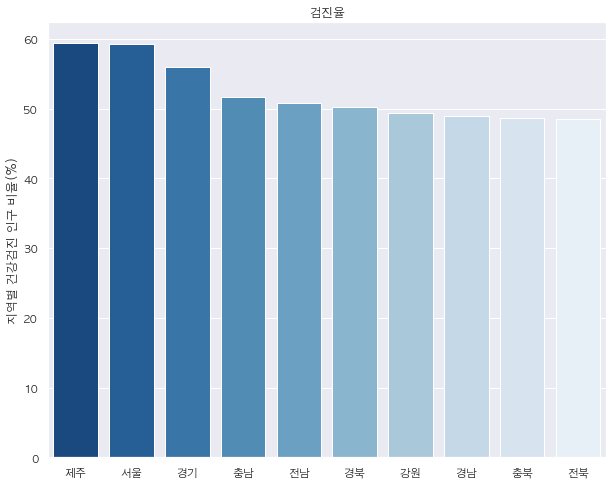

In [371]:
# 1번 : 인구수 대비 건강검진 받은 사람 비율
x = ['제주','서울','경기','충남','전남','경북','강원','경남','충북','전북']
y = sorted(check, reverse=True)

plt.figure(figsize = (10,8))
sns.barplot(x = x, y = y, palette='Blues_r')
plt.ylabel('지역별 건강검진 인구 비율(%)')
plt.title('검진율')
plt.show()

In [257]:
df_final.groupby(by="시도코드").mean()[['질병점수']]

,질병점수
시도코드,
강원,1.264117
경기,1.208286
경남,1.152318
경북,1.187935
서울,1.177625
전남,1.234763
전북,1.242122
제주,1.258886
충남,1.237564


질병점수  
best : 경기도
worst : 제주도

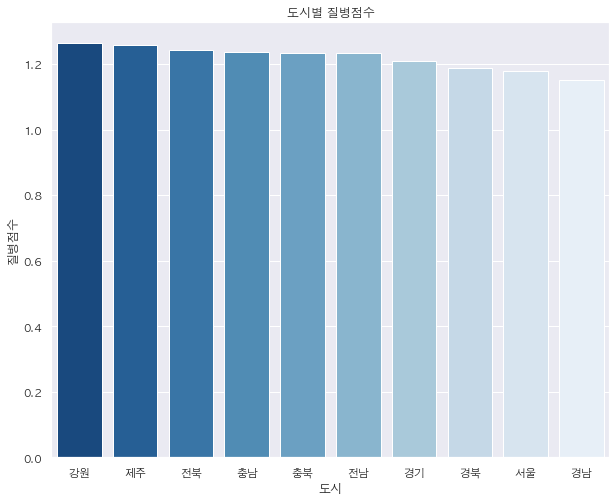

In [337]:
# 2-1번
# 도시별 질병점수 그래프

plt.figure(figsize = (10,8))
df_health = df_final.groupby(by="시도코드").mean()[['질병점수']].sort_values(by = '질병점수', ascending=False)

sns.barplot(data = df_health, x = df_health.index, y = '질병점수' ,palette="Blues_r")
plt.title('도시별 질병점수')
plt.xlabel('도시')
plt.show()


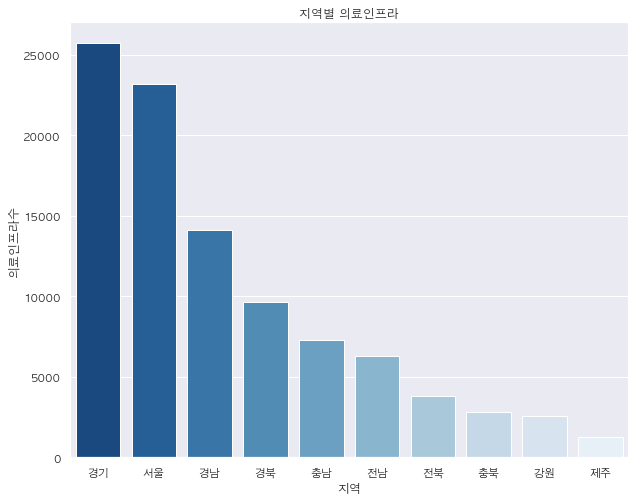

In [338]:
# 2-2번 의료시설 현황 그래프

md_infra_sort = md_infra.sort_values(by='의료인프라수', ascending=False)
plt.figure(figsize = (10,8))
sns.barplot(x = md_infra_sort['지역'], y = md_infra_sort['의료인프라수'],palette='Blues_r')
plt.ylabel('의료인프라수')
plt.title('지역별 의료인프라')
plt.show()

In [259]:
df_final_cp_count['아픈인간수'] = df_final.loc[df_final['질병점수']>0].groupby(['시도코드'])['질병점수'].count()
df_final_cp_count

,시도코드 별 검진자 수,아픈인간수
서울,164082,125736
경기,302301,234238
강원,31500,25167
충북,33528,26672
충남,78032,61859
전북,37422,29512
전남,65570,51586
경북,101450,78519
경남,161454,122701
제주,11743,9276


In [221]:
infra = []
for i in range(10):
    infra.append(round(df_final_cp_count['아픈인간수'][i] / md_infra['의료인프라수'][i], 2))
    
infra

[5.42, 9.1, 9.76, 9.52, 8.51, 7.73, 8.19, 8.15, 8.68, 7.34]

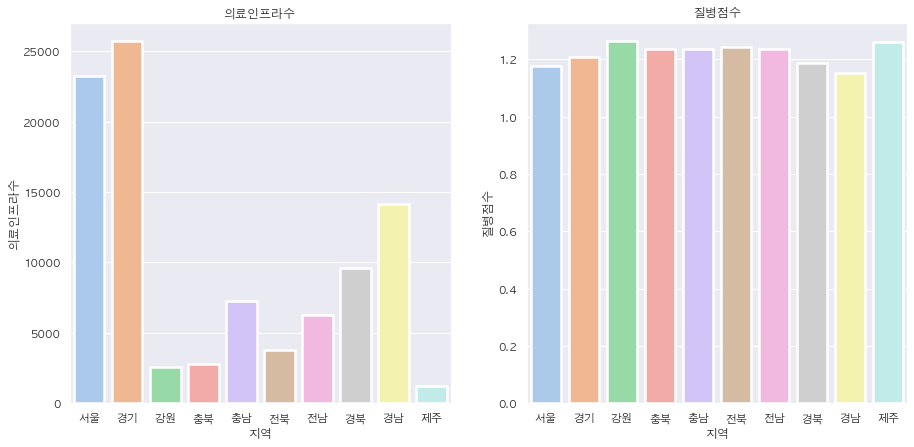

In [344]:
# 2-3 건강점수 평균과 의료시설 현황 비교 그래프

fig, axis = plt.subplots(1,2, figsize=(15,7))

sns.barplot(x = md_infra['지역'], y = md_infra['의료인프라수'],palette='pastel', linewidth=2.5,ax=axis[0])
axis[0].set_title('의료인프라수')

df_health2 = df_final.groupby(by="시도코드").mean()[['질병점수']].reindex(index=['서울','경기','강원','충북','충남','전북','전남','경북','경남','제주'])
sns.barplot(data = df_health2, x = df_health2.index, y = '질병점수',palette="pastel",linewidth=2.5,ax=axis[1])
axis[1].set_title('질병점수')
axis[1].set_xlabel('지역')
plt.show()